In [1]:
import os
import pandas as pd
#os.chdir("")
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.ets import AutoETS
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import mean_squared_error
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Train_SU63ISt.csv",index_col=1)
df1=df.drop(['ID'],axis=1)
df1.head()
#df1(index_col=0)
df1

,Count
Datetime,
25-08-2012 00:00,8
25-08-2012 01:00,2
25-08-2012 02:00,6
25-08-2012 03:00,2
25-08-2012 04:00,2
...,...
25-09-2014 19:00,868
25-09-2014 20:00,732
25-09-2014 21:00,702


(<Figure size 1600x400 with 1 Axes>, <Axes: >)

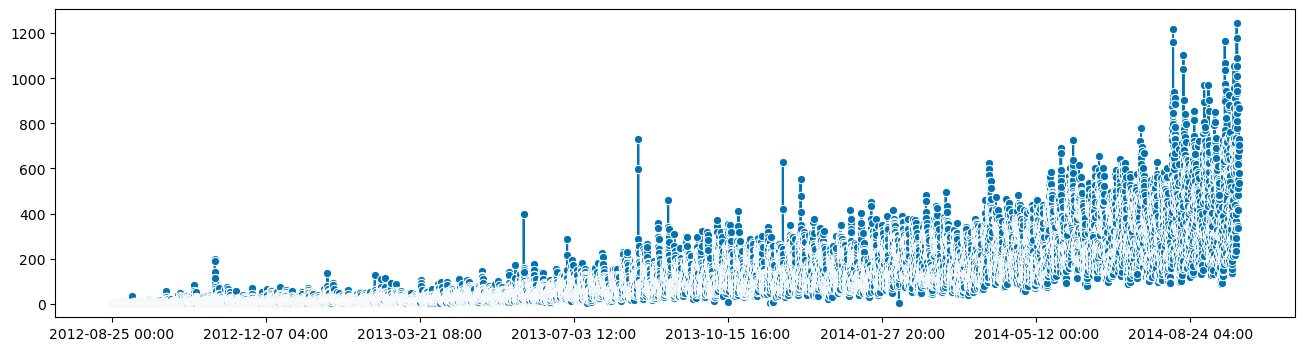

In [3]:
idx=pd.to_datetime(df1.index).to_period("H")
df1.index = idx
plot_series(df1)

In [4]:
y=df1["Count"]

In [5]:
fh=ForecastingHorizon(y.index,is_relative=False)
fh

ForecastingHorizon(['2012-08-25 00:00', '2012-08-25 01:00', '2012-08-25 02:00',
             '2012-08-25 03:00', '2012-08-25 04:00', '2012-08-25 05:00',
             '2012-08-25 06:00', '2012-08-25 07:00', '2012-08-25 08:00',
             '2012-08-25 09:00',
             ...
             '2014-09-25 14:00', '2014-09-25 15:00', '2014-09-25 16:00',
             '2014-09-25 17:00', '2014-09-25 18:00', '2014-09-25 19:00',
             '2014-09-25 20:00', '2014-09-25 21:00', '2014-09-25 22:00',
             '2014-09-25 23:00'],
            dtype='period[H]', length=18288, is_relative=False)

In [6]:
forecaster=AutoETS(auto=True,sp=24)
forecaster.fit(y)
print(forecaster.summary())

                                 ETS Results                                  
Dep. Variable:                      y   No. Observations:                18288
Model:                       ETS(MAM)   Log Likelihood              -82915.149
Date:                Fri, 17 Nov 2023   AIC                         165890.297
Time:                        11:07:12   BIC                         166124.717
Sample:                    08-25-2012   HQIC                        165967.326
                         - 09-25-2014   Scale                            0.107
Covariance Type:               approx                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.3354      0.004     75.730      0.000       0.327       0.344
smoothing_trend      3.354e-05   1.85e-05      1.809      0.070   -2.79e-06    6.99e-05
smoothing_season

In [7]:
df_test=pd.read_csv("Test_0qrQsBZ.csv",index_col=1)
idx=pd.to_datetime(df_test.index).to_period("H")
df_test.index = idx
df_test.head()

,ID
Datetime,
2014-09-26 00:00,18288
2014-09-26 01:00,18289
2014-09-26 02:00,18290
2014-09-26 03:00,18291
2014-09-26 04:00,18292


In [8]:
fh=ForecastingHorizon(df_test.index,is_relative=False)
fh

ForecastingHorizon(['2014-09-26 00:00', '2014-09-26 01:00', '2014-09-26 02:00',
             '2014-09-26 03:00', '2014-09-26 04:00', '2014-09-26 05:00',
             '2014-09-26 06:00', '2014-09-26 07:00', '2014-09-26 08:00',
             '2014-09-26 09:00',
             ...
             '2015-04-26 14:00', '2015-04-26 15:00', '2015-04-26 16:00',
             '2015-04-26 17:00', '2015-04-26 18:00', '2015-04-26 19:00',
             '2015-04-26 20:00', '2015-04-26 21:00', '2015-04-26 22:00',
             '2015-04-26 23:00'],
            dtype='period[H]', name='Datetime', length=5112, is_relative=False)

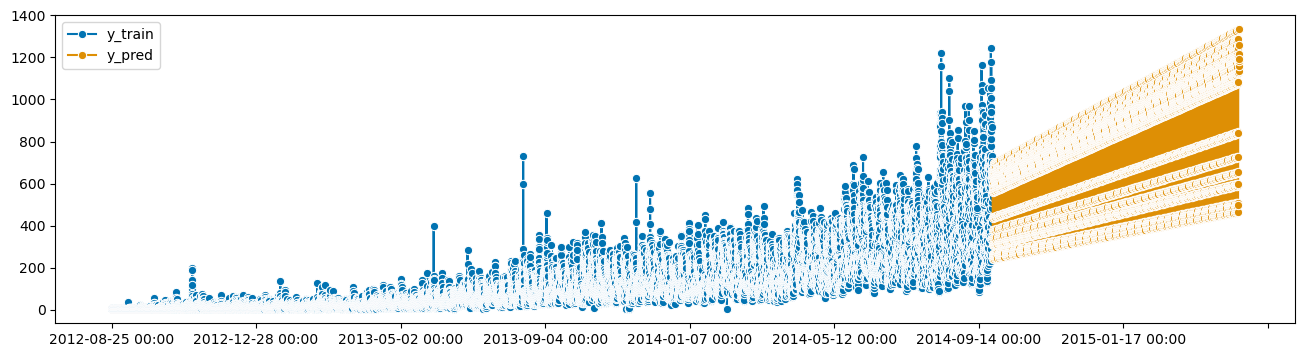

In [9]:
y_pred=forecaster.predict(fh)
plot_series(y,y_pred,labels=["y_train","y_pred"])
plt.show()

In [10]:
import numpy as np
submit=pd.read_csv('sample_submission_LSeus50.csv')
submit['Count']=np.around(y_pred.values)
submit.to_csv("/home/dai/Desktop/Practical Machine Learning/Day-13/autoETS.csv",index=False)

In [11]:
#Score :190

# arimax

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error
from pmdarima.arima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [13]:
df=pd.read_csv("Train_SU63ISt.csv",index_col=1)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18288 entries, 25-08-2012 00:00 to 25-09-2014 23:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      18288 non-null  int64
 1   Count   18288 non-null  int64
dtypes: int64(2)
memory usage: 428.6+ KB


In [14]:
y = df['Count']

print(y)

Datetime
25-08-2012 00:00      8
25-08-2012 01:00      2
25-08-2012 02:00      6
25-08-2012 03:00      2
25-08-2012 04:00      2
                   ... 
25-09-2014 19:00    868
25-09-2014 20:00    732
25-09-2014 21:00    702
25-09-2014 22:00    580
25-09-2014 23:00    534
Name: Count, Length: 18288, dtype: int64


In [15]:
model = auto_arima(y_train, trace=True, error_action='ignore', 
                  suppress_warnings=True,seasonal=True,m=24)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=187702.293, Time=8.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=187752.233, Time=0.62 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=187738.425, Time=0.74 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=187739.699, Time=1.51 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=187750.242, Time=0.39 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=187703.352, Time=5.99 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=187702.880, Time=6.00 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=187706.868, Time=8.85 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=187706.097, Time=22.47 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=187726.148, Time=3.91 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=29.23 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=187704.709, Time=8.34 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=40.34 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=187700.300, Time=3.07 sec
 ARIMA(1,1,2)(0,

In [16]:
import numpy as np
forecast = model.predict(n_periods=6)
forecast = pd.DataFrame(forecast,index = np.arange(y.shape[0]+1,y.shape[0]+7),
                        columns=['Prediction'])

forecast

,Prediction
18289,NaN
18290,NaN
18291,NaN
18292,NaN
18293,NaN
18294,NaN


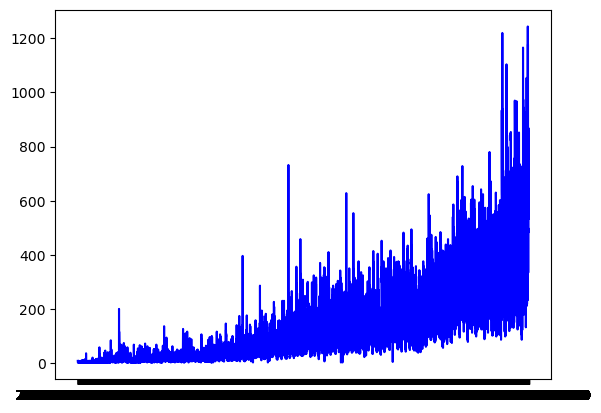

In [17]:
#plot the predictions for validation set
plt.plot(y, label='Train',color="blue")

plt.plot(forecast, label='Prediction',color="purple")
plt.show()

In [18]:
rms = sqrt(mean_squared_error(y_test, predictions))
print('Test RMSE: %.3f' % rms)

NameError: name 'y_test' is not defined